['01_mask.gif', '02_mask.gif', '03_mask.gif', '04_mask.gif', '05_mask.gif', '06_mask.gif', '07_mask.gif', '08_mask.gif', '09_mask.gif', '10_mask.gif', '11_mask.gif', '12_mask.gif', '13_mask.gif', '14_mask.gif', '15_mask.gif', '16_mask.gif', '17_mask.gif', '18_mask.gif', '19_mask.gif', '20_mask.gif', '21_mask.gif', '22_mask.gif', '23_mask.gif', '24_mask.gif', '25_mask.gif', '26_mask.gif', '27_mask.gif', '28_mask.gif', '29_mask.gif', '30_mask.gif', '31_mask.gif', '32_mask.gif', '33_mask.gif', '34_mask.gif', '35_mask.gif', '36_mask.gif', '37_mask.gif', '38_mask.gif', '39_mask.gif', '40_mask.gif']


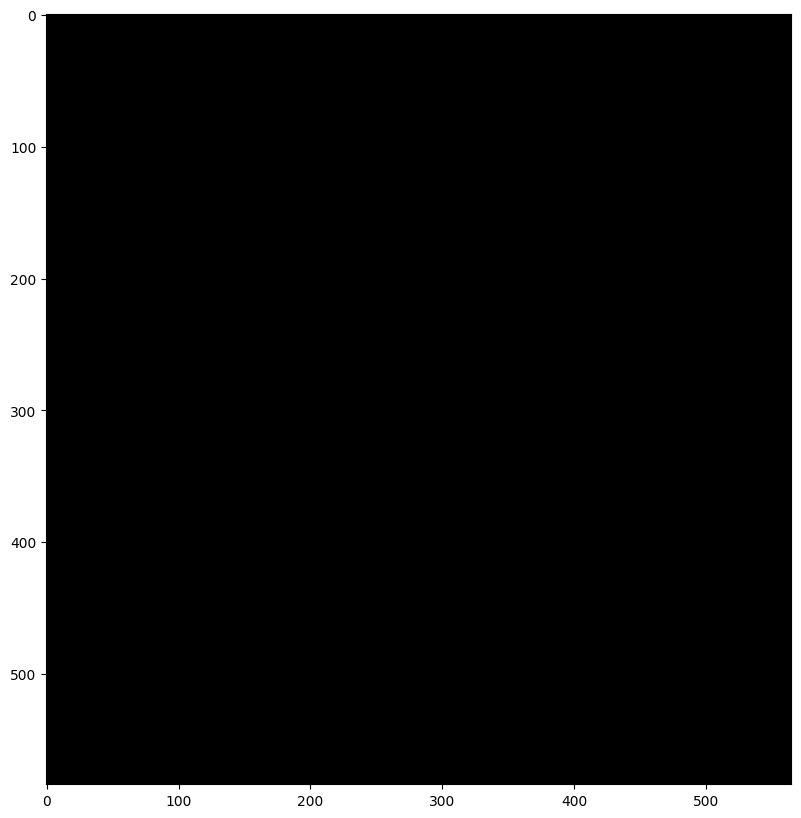

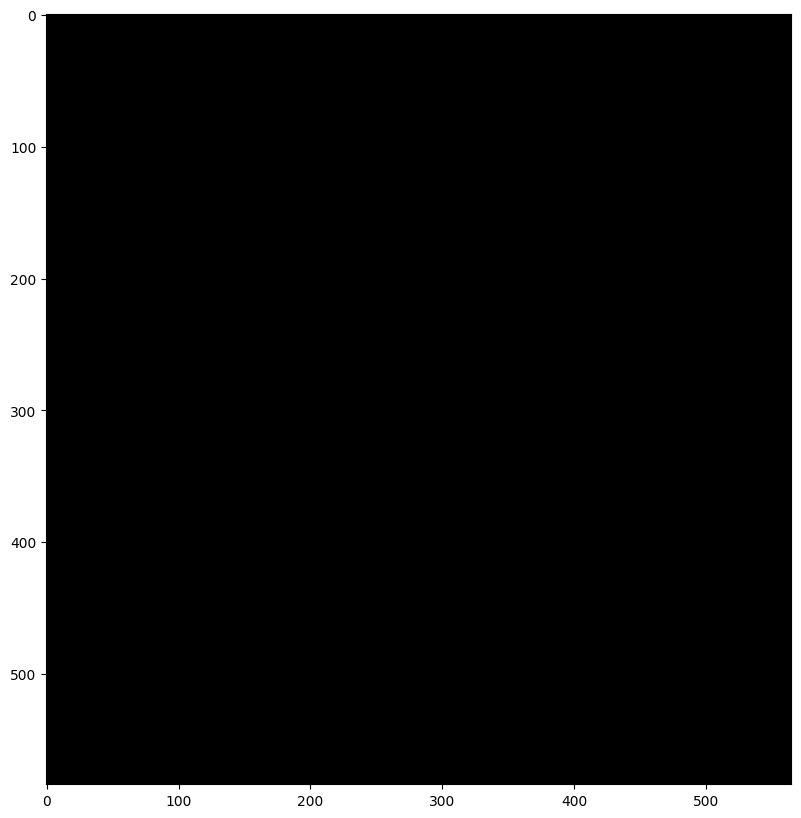

In [6]:
import pickle, os
import numpy as np
import sys
import skimage as ski
from pathlib import Path
from PIL import Image
from matplotlib import pyplot as plt
import geopandas as gpd

# Linux  
#root_dir = f"/home/adriano/projeto_mestrado/modules"
#sys.path.insert(0, "/home/adriano/projeto_mestrado/modules")

# Windows  
root_dir = Path(r"C:\Users\adria\Documents\Mestrado\texture_codes\modules")
sys.path.insert(0, r"C:\Users\adria\Documents\Mestrado\texture_codes\modules")

from Background import background_generation as backgen
import functions

img_dir = f'{root_dir}/Images/retina/images/'
img_mask = f'{root_dir}/Images/retina/mask/'

images_vector = functions.read_directories(img_dir)
mask_vector = functions.read_directories(img_mask)

print(mask_vector)

#for i in range(len(images_vector)):
for i in range(2):

    img = np.array(Image.open(f'{img_dir}/{images_vector[i]}'))
    mask = np.array(Image.open(f'{img_mask}/{mask_vector[i]}'))
    
    cut = backgen.remove_artifacts(img,mask)

    plt.figure(figsize=[10, 10])
    plt.imshow(cut, 'gray')
    #plt.savefig('back_artif4.svg', format='svg')
    plt.show()
